In [3]:
import sqlite3
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

DB_PATH = "./tripadvisor.db"
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

# Ajouter les colonnes latitude et longitude dans la table restaurant si elles n'existent pas déjà
try:
    cursor.execute("ALTER TABLE restaurant ADD COLUMN latitude REAL")
    cursor.execute("ALTER TABLE restaurant ADD COLUMN longitude REAL")
except sqlite3.OperationalError:
    # Les colonnes existent déjà
    pass

# Initialiser le géocodeur
geolocator = Nominatim(user_agent="restaurant_geocoder")

# Fonction pour obtenir les coordonnées géographiques
def get_coordinates(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

# Récupérer les données nécessaires pour construire les adresses complètes
query = """
    SELECT r.ID_RESTAURANT, r.ADDRESS, pc.POSTAL_CODE, c.CITY_NAME
    FROM restaurant r
    LEFT JOIN postal_code pc ON r.POSTAL_CODE = pc.ID_POSTAL_CODE
    LEFT JOIN city c ON r.CITY = c.ID_CITY
"""
cursor.execute(query)
restaurants = cursor.fetchall()

# Mettre à jour les coordonnées pour chaque restaurant
for restaurant in restaurants:
    id_restaurant, address, postal_code, city_name = restaurant

    # Construire l'adresse complète
    full_address = ", ".join(filter(None, [address, postal_code, city_name]))
    latitude, longitude = get_coordinates(full_address)

    # Mettre à jour les colonnes latitude et longitude dans la base de données
    cursor.execute("""
        UPDATE restaurant
        SET latitude = ?, longitude = ?
        WHERE ID_RESTAURANT = ?
    """, (latitude, longitude, id_restaurant))

    print(f"Restaurant ID {id_restaurant}: Latitude={latitude}, Longitude={longitude}")

# Enregistrer les changements et fermer la connexion
conn.commit()
conn.close()


Restaurant ID 1: Latitude=45.7776456, Longitude=4.833862
Restaurant ID 2: Latitude=45.762254, Longitude=4.826431
Restaurant ID 3: Latitude=45.7517674, Longitude=4.831067
Restaurant ID 4: Latitude=45.7784854, Longitude=4.847031
Restaurant ID 5: Latitude=None, Longitude=None
Restaurant ID 6: Latitude=45.7494767, Longitude=4.8297218
Restaurant ID 7: Latitude=45.7482949, Longitude=4.8629144
Restaurant ID 8: Latitude=45.7608879, Longitude=4.8492335
Restaurant ID 9: Latitude=45.7670338, Longitude=4.856015
Restaurant ID 10: Latitude=45.7677269, Longitude=4.8308293
Restaurant ID 11: Latitude=45.7564157, Longitude=4.8330604
Restaurant ID 12: Latitude=45.7620324, Longitude=4.832725
Restaurant ID 13: Latitude=45.7623426, Longitude=4.8328642
Restaurant ID 14: Latitude=45.7713437, Longitude=4.8373276
Restaurant ID 15: Latitude=45.7713951, Longitude=4.8372298
Restaurant ID 16: Latitude=45.7617072, Longitude=4.8502101
Restaurant ID 17: Latitude=45.7519521, Longitude=4.8306478
Restaurant ID 18: Latitu

In [4]:
import pandas as pd

with sqlite3.connect(DB_PATH) as conn:
    query = "SELECT * FROM restaurant"
    data_restau = pd.read_sql_query(query, conn)

In [8]:
data_restau

,ID_RESTAURANT,SOURCE_PAGE,RESTAURANT_NAME,CLAIMED,PRICE_RANGE,ADDRESS,POSTAL_CODE,CITY,COUNTRY,PHONE_NUMBER,OPENING_HOURS,TRAVELERS_CHOICE,DETAILED_RATING,DETAILS,REVIEW_NUMBER,OVERALL_RATING,RANKING,latitude,longitude
0,1,https://www.tripadvisor.fr/Restaurant_Review-g...,Aromatic Restaurant,b'\x01',Française,15 Rue du Chariot d'Or,1,1,1,+33 4 78 23 73 61,"[""Dimanche"", ""Fermé "", ""Lundi"", ""Fermé "", ""Mar...",2024,"{""Excellent"": 934, ""Horrible"": 5, ""Moyen"": 41,...","{""CUISINES"": ""[\""Française, \"", \""Européenne\""...",b'^\x04\x00\x00\x00\x00\x00\x00',5.0,"{""over"": 3178, ""rank"": 49}",45.777646,4.833862
1,2,https://www.tripadvisor.fr/Restaurant_Review-g...,Au 14 Fevrier Vieux Lyon,b'\x01',€€€€,36 rue du Bœuf,1,1,1,+33 4 78 92 91 39,"["""", ""Cuisine"", ""4,8 sur 5 bulles"", """", ""Servi...",,"{""Excellent"": 466, ""Horrible"": 6, ""Moyen"": 28,...","{""CUISINES"": ""[\""Française, \"", \""Européenne\""...",b'Q\x02\x00\x00\x00\x00\x00\x00',4.5,"{""over"": 3178, ""rank"": 40}",45.762254,4.826431
2,3,https://www.tripadvisor.fr/Restaurant_Review-g...,BLO Restaurant,b'\x01',Française,37 Rue de la Charite,1,1,1,+33 4 72 31 76 95,"[""Dimanche"", ""Fermé "", ""Lundi"", ""12:00-14:0019...",2024,"{""Excellent"": 241, ""Horrible"": 4, ""Moyen"": 15,...","{""CUISINES"": ""[\""Française, \"", \""Steakhouse, ...","b',\x01\x00\x00\x00\x00\x00\x00'",4.5,"{""over"": 3178, ""rank"": 65}",45.751767,4.831067
3,4,https://www.tripadvisor.fr/Restaurant_Review-g...,Buvette des Cygnes,b'\x00',€,Parc de la Tete D Or,1,1,1,+33 4 78 89 11 27,"["""", ""Cuisine"", ""2,9 sur 5 bulles"", """", ""Servi...",,"{""Excellent"": 124, ""Horrible"": 153, ""Moyen"": 2...","{""CUISINES"": ""[\""Française\""]"", ""FONCTIONNALIT...",b'\x8d\x01\x00\x00\x00\x00\x00\x00',3.0,"{""over"": 3178, ""rank"": 2}",45.778485,4.847031
4,5,https://www.tripadvisor.fr/Restaurant_Review-g...,Empanadas Club,b'\x01',Latino,4 Rue Pizay Près De La Place Des Terreaux,1,1,1,+33 4 83 43 27 23,"[""Dimanche"", ""12:00-15:0019:00-23:00"", ""Lundi""...",2024,"{""Excellent"": 383, ""Horrible"": 1, ""Moyen"": 4, ...","{""CUISINES"": ""[\""Latino, \"", \""Saine, \"", \""Ar...",b'\xa2\x01\x00\x00\x00\x00\x00\x00',5.0,"{""over"": 3178, ""rank"": 6}",NaN,NaN
5,6,https://www.tripadvisor.fr/Restaurant_Review-g...,Flair,b'\x01',Française,84 rue de la Charite,3,1,1,+33 4 72 56 06 31,"[""Dimanche"", ""Fermé "", ""Lundi"", ""Fermé "", ""Mar...",,"{""Excellent"": 727, ""Horrible"": 4, ""Moyen"": 57,...","{""CUISINES"": ""[\""Française, \"", \""Internationa...",b'\xe1\x03\x00\x00\x00\x00\x00\x00',4.5,"{""over"": 3178, ""rank"": 51}",45.749477,4.829722
6,7,https://www.tripadvisor.fr/Restaurant_Review-g...,Kaffee Berlin Sans-Souci,b'\x01',€,26 Cours Albert Thomas,1,1,1,+33 6 18 81 37 13,"["""", ""Cuisine"", ""4,0 sur 5 bulles"", """", ""Servi...",,"{""Excellent"": 138, ""Horrible"": 29, ""Moyen"": 36...","{""CUISINES"": ""[\""Américaine, \"", \""Allemande, ...",b'y\x01\x00\x00\x00\x00\x00\x00',4.0,"{""over"": 3178, ""rank"": 425}",45.748295,4.862914
7,8,https://www.tripadvisor.fr/Restaurant_Review-g...,L'Alexandrin,b'\x01',€€€€,83 Rue Moncey,1,1,1,+33 4 72 61 15 69,"["""", ""Cuisine"", ""4,6 sur 5 bulles"", """", ""Servi...",,"{""Excellent"": 579, ""Horrible"": 16, ""Moyen"": 47...","{""CUISINES"": ""[\""Française, \"", \""Européenne\""...",b'\xf7\x02\x00\x00\x00\x00\x00\x00',4.5,"{""over"": 3178, ""rank"": 12}",45.760888,4.849234
8,9,https://www.tripadvisor.fr/Restaurant_Review-g...,L'Argot,b'\x01',Française,132 Rue Bugeaud,4,1,1,+33 4 78 24 57 88,"[""Dimanche"", ""Fermé "", ""Lundi"", ""Fermé "", ""Mar...",2024,"{""Excellent"": 594, ""Horrible"": 10, ""Moyen"": 22...","{""CUISINES"": ""[\""Française, \"", \""Européenne, ...",b'\x15\x03\x00\x00\x00\x00\x00\x00',4.5,"{""over"": 3178, ""rank"": 67}",45.767034,4.856015
9,10,https://www.tripadvisor.fr/Restaurant_Review-g...,L'Atelier des Augustins,b'\x01',€€€€,17 Rue Hippolyte Flandrin,5,1,1,+33 4 72 00 88 01,"["""", ""Cuisine"", ""4,7 sur 5 bul

In [31]:
data_restau.DETAILS[8]

'{"CUISINES": "[\\"Française, \\", \\"Européenne, \\", \\"Saine\\"]", "FONCTIONNALITÉS": "[\\"Accessible en fauteuil roulant\\", \\"Cartes bancaires acceptées\\", \\"American\xa0\\", \\"Express\\", \\"Chèques-cadeaux disponibles\\", \\"Mastercard\\", \\"Paiements électroniques\\", \\"Places assises\\", \\"Réservations\\", \\"Restaurants non-fumeurs\\", \\"Sert de l\'alcool\\", \\"Service de table\\", \\"Terrasse\\", \\"Visa\\"]", "PRIX": "[]", "Types de repas": "[\\"Déjeuner, \\", \\"Dîner\\"]"}'

In [32]:
data_restau.PRICE_RANGE

0              Française
1                   €€€€
2              Française
3                      €
4                 Latino
5              Française
6                      €
7                   €€€€
8              Française
9                   €€€€
10             Française
11                     €
12                     €
13             Française
14                  €€€€
15             Française
16                  €€€€
17             Française
18             Française
19                  €€€€
20             Marocaine
21             Française
22                     €
23                     €
24             Française
25            Américaine
26             Française
27             Française
28                     €
29                  €€€€
30             Française
31             Japonaise
32    Repas sur le pouce
Name: PRICE_RANGE, dtype: object

Erreur lors de l'extraction des cuisines : the JSON object must be str, bytes or bytearray, not Series


[]

In [9]:
with sqlite3.connect(DB_PATH) as conn:
    query = "SELECT * FROM reviews"
    data_reviews = pd.read_sql_query(query, conn)

In [50]:
data_reviews.VISIT_CONTEXT.unique()

array(['couples', 'friends', 'family', 'business', 'none', 'solo',
       'table.Plus', 'experience.Plus', '!Plus', 'réserver.Plus',
       'méritéePlus', 'Plus', '.Plus', '..."Plus', 'vous!Plus',
       'MerciPlus', 'met.Plus', 'magiquePlus', 'foisPlus', ':-)Plus',
       'soirée.Plus', 'domaine.Plus', 'méritent....Plus', '!!!Plus',
       '2!Plus', 'finirPlus', 'pleurs.Plus', 'midi.Plus',
       'recommande!!Plus', '100%!Plus', 'âmePlus', 'Lyon.Plus',
       'possible.Plus', 'agréable.Plus', 'adresse.Plus', 'bonheur.Plus',
       'reviendrons.Plus', 'rempli.Plus', 'reviendronsPlus',
       'retenirPlus', 'incoryable!!!Plus', 'déçus!Plus',
       "d'avance...Plus", 'sympaPlus', "l'original!Plus", 'côté.Plus',
       'dommage.Plus', 'chef.Plus', 'chaleureusement.Plus',
       'attentionné.Plus', 'plus.Plus', 'gâteau;)Plus', 'parfait!Plus',
       'echec.Plus', 'coût.Plus', 'revenir.Plus',
       '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Plus', 'clientsPlus',
       'pense..Plus', 'essayerPlus

In [51]:
data_reviews

,ID_REVIEW,ID_RESTAURANT,N_CONTRIB,REVIEW_TITLE,REVIEW_BODY,REVIEW_SCORE,REVIEW_DAY,REVIEW_MONTH,REVIEW_YEAR,VISIT_MONTH,VISIT_YEAR,VISIT_CONTEXT,REVIEW_DATE
0,1,1,1,Super tout,"Super service, super entrée, super plat et sup...",5.0,21,12,2024,déc.,2024,couples,2024-12-01
1,2,1,1,Excellente découverte,Un menu découverte fantastique avec des produi...,5.0,3,12,2024,déc.,2024,couples,2024-12-01
2,3,1,45,Une belle découverte,L'accueil était chaleureux et le service impec...,4.0,1,12,2024,nov.,2024,couples,2024-12-01
3,4,1,2,Temps de partage et de convivialité très agréable,Nous avons apprécié la qualité du dîner : prod...,4.0,30,11,2024,nov.,2024,friends,2024-11-01
4,5,1,893,Plat aboutis et savoureux,Une très bon moment entre amis!\n\nLes plats s...,5.0,16,11,2024,nov.,2024,friends,2024-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20405,20406,33,232,Miam,Super option végétarienne dans centre de Lyon....,5.0,20,02,2016,févr.,2016,none,2016-02-01
20406,20407,33,3,Délicieux,L'endroit est petit mais agréable et propre et...,5.0,1,01,2016,déc.,2015,couples,2016-01-01
20407,20408,33,7,Surévalué,Le goût est assez ennuyeux. Le pain n'est pas ...,2.0,26,10,2015,août,2015,friends,2015-10-01
20408,20409,33,40,Excellent falafel à Lyon,"Dans le centre-ville, c'est un très bon endroi...",5.0,20,10,2015,août,2015,friends,2015-10-01


In [11]:
def get_top_reviews_for_restaurant(restaurant_id, limit=3):
    with sqlite3.connect(DB_PATH) as conn:
        query = """
            SELECT REVIEW_TITLE, REVIEW_BODY, REVIEW_SCORE
            FROM reviews
            WHERE ID_RESTAURANT = ?
            ORDER BY REVIEW_SCORE DESC
            LIMIT ?
        """
        cursor = conn.cursor()
        cursor.execute(query, (restaurant_id, limit))
        rows = cursor.fetchall()
        
    top_reviews = [{"title": row[0], "body": row[1], "score": row[2]} for row in rows]
    return top_reviews

In [13]:
get_top_reviews_for_restaurant(3)

[{'title': 'Viandes d’exception dans un écrin chaleureux !',
  'body': 'Que dire…du plaisir à l’état pur chez BLO. Viandes d’exception, parfaitement cuites, accompagnements délicieux (et on peut demander un peu de rab sans problème, comme annoncé en début de service), des références de vins magnifiques, une équipe formidable, et un lieu chaleureux comme un écrin !\nBref on a adoré cette soirée . Merci!',
  'score': 5.0},
 {'title': 'Top 👍',
  'body': 'Tout a été parfait! La qualité des produits est au rendez-vous, mais le service et l’accueil on été top. Je recommande!!',
  'score': 5.0},
 {'title': 'Excellent !',
  'body': "Endroit vivant, chaleureux et serveurs très aimable ! je conseille fortement si vous n'avez pas peur des portions généreuses !",
  'score': 5.0}]

In [18]:
def get_tendency_by_year_month(year, month, restaurant_id=None):
    """
    Récupère la tendance des notes des avis pour une année et un mois spécifiques.
    Si un restaurant_id est spécifié, filtre par ce restaurant.
    """
    query = """
        SELECT REVIEW_YEAR, REVIEW_MONTH, AVG(REVIEW_SCORE) AS avg_score
        FROM REVIEWS
        WHERE REVIEW_YEAR = ? AND REVIEW_MONTH = ?
    """
    params = (year, month)
    
    if restaurant_id:
        query += " AND ID_RESTAURANT = ?"
        params += (restaurant_id,)

    query += " GROUP BY REVIEW_YEAR, REVIEW_MONTH ORDER BY REVIEW_YEAR, REVIEW_MONTH"

    with sqlite3.connect(DB_PATH) as conn:
        df = pd.read_sql_query(query, conn, params=params)

    return df

In [19]:
get_tendency_by_year_month(2024, "novembre", restaurant_id=1)

,REVIEW_YEAR,REVIEW_MONTH,avg_score
0,2024,novembre,4.5


In [14]:
def get_review_distribution(cursor, restaurant_id):

    query = """
        SELECT REVIEW_SCORE, COUNT(*) AS count
        FROM reviews
        WHERE ID_RESTAURANT = ?
        GROUP BY REVIEW_SCORE
        ORDER BY REVIEW_SCORE
        """
        
    cursor.execute(query, (restaurant_id,))
    rows = cursor.fetchall()
        
    review_distribution = {row[0]: row[1] for row in rows}
        
    return review_distribution

In [15]:
import matplotlib.pyplot as plt
def get_review_distribution_plot(restaurant_id):
    # Récupération des données de la distribution des scores
    distribution = get_review_distribution(None, restaurant_id)
    
    # Tracer la distribution avec matplotlib
    fig, ax = plt.subplots()
    ax.bar(distribution.keys(), distribution.values(), color='skyblue')
    ax.set_xlabel('Note')
    ax.set_ylabel('Nombre de commentaires')
    ax.set_title(f'Distribution des commentaires pour le restaurant {restaurant_id}')
    return fig

In [16]:
get_review_distribution_plot(1)

AttributeError: 'NoneType' object has no attribute 'execute'

In [7]:
import json

def extract_cuisines(detail):
    try:
        # Charger le JSON dans un dictionnaire Python
        data = json.loads(detail)
        # Extraire et nettoyer la liste des cuisines
        cuisines = data.get("CUISINES", "").strip("[]").replace('"', '').split(", ")
        return cuisines
    except Exception as e:
        print(f"Erreur lors de l'extraction des cuisines : {e}")
        return []

# Exemple d'application de la fonction à la colonne DETAILS
def get_cuisines_from_db(connection):
    cursor = connection.cursor()
    
    # Exécuter une requête pour récupérer les details des restaurants
    cursor.execute("SELECT DETAILS FROM restaurant")
    details = cursor.fetchall()
    
    # Extraire les cuisines pour chaque restaurant
    cuisines_list = []
    for detail in details:
        cuisines = extract_cuisines(detail[0])
        cuisines_list.extend(cuisines)
    
    return cuisines_list

# Afficher les cuisines extraites
cuisines = get_cuisines_from_db(conn)  # Connexion à la base de données SQLite
print(cuisines)


['Française', '', 'Européenne', 'Française', '', 'Européenne', 'Française', '', 'Steakhouse', '', 'Grillades', '', 'Brasserie gastronomique', 'Française', 'Latino', '', 'Saine', '', 'Argentine', '', 'Sud-américaine', 'Française', '', 'Internationale', '', 'Européenne', '', 'Saine', 'Américaine', '', 'Allemande', '', 'Bar à bières', '', 'Bar', '', 'Européenne', 'Française', '', 'Européenne', 'Française', '', 'Européenne', '', 'Saine', 'Française', '', 'Européenne', '', 'Moderne', '', 'Saine', 'Française', '', 'Européenne', 'Française', '', 'Européenne', 'Française', '', 'Européenne', 'Française', '', 'Européenne', '', 'Saine', 'Française', '', 'Européenne', 'Française', '', 'Européenne', '', 'Saine', 'Française', 'Française', '', 'Fusion', 'Française', 'Française', '', 'Saine', 'Marocaine', '', 'Méditerranéenne', '', 'Moyen-', 'Orient', 'Française', '', 'Européenne', '', 'Saine', 'Libanaise', '', 'Méditerranéenne', '', 'Saine', '', 'Moyen-', 'Orient', 'Asiatique', '', 'Vietnamienne', 'F

In [25]:
def extract_fourchette(detail):
    try:
        # Charger le JSON dans un dictionnaire Python
        data = json.loads(detail)
        # Extraire et nettoyer la liste des cuisines
        fourchette = data.get("FOURCHETTE DE PRIX", "").strip("[]").replace('"', '').split(", ")
        return fourchette
    except Exception as e:
        print(f"Erreur lors de l'extraction fourchette de prix : {e}")
        return []

# Exemple d'application de la fonction à la colonne DETAILS
def get_fourchette_from_db(connection):
    cursor = connection.cursor()
    
    # Exécuter une requête pour récupérer les details des restaurants
    cursor.execute("SELECT DETAILS FROM restaurant")
    details = cursor.fetchall()
    
    # Extraire les cuisines pour chaque restaurant
    fourchette_list = []
    for detail in details:
        fourchette = extract_fourchette(detail[1])
        fourchette_list.extend(cuisines)
    
    return fourchette_list

# Afficher les cuisines extraites
fourchette = get_fourchette_from_db(conn)  # Connexion à la base de données SQLite
print(fourchette)


IndexError: tuple index out of range

In [33]:
def load_restaurant_names():
    with sqlite3.connect(DB_PATH) as conn:
        cursor = conn.cursor()
        query = "SELECT RESTAURANT_NAME FROM RESTAURANT"
        cursor.execute(query)
        restaurant_names = [row[0] for row in cursor.fetchall()]
    return restaurant_names

In [36]:
load_restaurant_names()

['Aromatic Restaurant',
 'Au 14 Fevrier Vieux Lyon',
 'BLO Restaurant',
 'Buvette des Cygnes',
 'Empanadas Club',
 'Flair',
 'Kaffee Berlin Sans-Souci',
 "L'Alexandrin",
 "L'Argot",
 "L'Atelier des Augustins",
 "L'Institut Restaurant",
 "L'Épicerie de Ginette - Bistrot à Tartines - Lyon 2",
 'La Cabane',
 'La Gargotte',
 'La Mere Brazier',
 'La Table 101',
 'La Table d’Ambre',
 "Le Boeuf D'argent",
 'Le Casse Museau',
 'Le Neuvième Art',
 'Le Palais Des Tajines',
 'Le Passe Temps Restaurant',
 'Le Roi Falafel',
 'Les 9 Lotus',
 'Mama Restaurant Lyon',
 'Ninkasi Guillotiere',
 'Prairial',
 'Restaurant Le Musée',
 'Slake',
 'Table & Partage',
 'Takao Takano',
 'Wasabi',
 'Yaafa']

In [37]:
# Fonction pour récupérer les années dans la table reviews
def load_review_years():
    with sqlite3.connect(DB_PATH) as conn:
        cursor = conn.cursor()
        query = "SELECT DISTINCT REVIEW_YEAR FROM REVIEWS ORDER BY REVIEW_YEAR ASC"
        cursor.execute(query)
        review_years = [row[0] for row in cursor.fetchall()]
    return review_years

In [38]:
load_review_years()

['!',
 '!!',
 "'technique'",
 '+un',
 ',',
 '.cette',
 '.comme',
 '.je',
 '12',
 '16',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 '2025',
 '21',
 '27',
 '30',
 '31',
 '9',
 '9e',
 'A',
 'Allez',
 'Aromatic',
 'Attention,',
 'Au',
 'Bien',
 'Bordeaux',
 'Brouilly',
 "C'est",
 'C.',
 'Caroline',
 'Cher',
 'Coline',
 'Cédric',
 'C’est',
 'En',
 'Fabrice.',
 'Francis',
 'Frédérique',
 'Gentil,',
 'Il',
 'JP',
 'Je',
 'Jean-Marc',
 'La',
 'Laetitia',
 'Léonie',
 'MAMA',
 'MERCI',
 'Madame,',
 'Manon',
 'Marie',
 'Merci',
 'Merci,',
 'Monsieur,',
 'MuseauBonsoir',
 'MuseauCher',
 'MuseauEn',
 'MuseauMagnifie',
 'MuseauMagnifique',
 'MuseauMerci',
 'MuseauNosu',
 'MuseauNous',
 'MuseauRetour',
 'MuseauToute',
 'MuseauUn',
 'Museau🙌🙌🙌nous',
 'Museau🙏🙏🙏',
 'Nathalie',
 'Ninkasi',
 'Nous',
 'Noël',
 'Néanmoins,',
 'Odile',
 'On',
 'Petit',
 'Pierre',
 'PlusRédigé',
 'Quel',
 'R

In [39]:
# Fonction pour récupérer les mois dans la table reviews
def load_review_months():
    with sqlite3.connect(DB_PATH) as conn:
        cursor = conn.cursor()
        query = "SELECT DISTINCT REVIEW_MONTH FROM REVIEWS ORDER BY REVIEW_MONTH ASC"
        cursor.execute(query)
        review_months = [row[0] for row in cursor.fetchall()]
    return review_months

In [40]:
load_review_months()

['!',
 '!!',
 '!!!!',
 ',',
 '.',
 '...et',
 '..si',
 '.Merci',
 '.certes',
 '.merci',
 '0812,',
 '1000',
 '27',
 '31',
 '69',
 '844hakimr,',
 '9',
 ':',
 ':"',
 ':)',
 ';)',
 'A',
 'A,',
 'ANNE',
 'Ah',
 'Alann,',
 'Arnaud,',
 'Aromatic',
 'Au',
 'B,',
 'Bam',
 'Bidot,',
 'Bien',
 'Bigluc,',
 'Bonjour,',
 "C'est",
 'C,',
 'Camille',
 'Casse',
 'Ce',
 'Chaque',
 'Cher',
 'Clemouille,',
 'Coline',
 'Comme',
 'Compte',
 'C’est',
 'D',
 'D,',
 'Daniel',
 'Diana',
 'Dupeuble,',
 'E',
 'En',
 'Etiez',
 'Extraoorddinnnaiirreeee',
 'F,',
 'G,',
 'G.,',
 'Garance',
 'Gaëtan',
 'Geraldvirey,',
 'Gilles',
 'Grand',
 'Génial',
 'H,',
 'Hello',
 'Isa,',
 "J'adore",
 'J,',
 'Je',
 'Jean-Pascal',
 'K,',
 'L,',
 'La',
 'Laura,',
 'Le',
 'Les',
 'M,',
 'M.',
 'M.,',
 'Madame',
 'Madame,',
 'Madamr',
 'Mais',
 'Mama',
 'Margot',
 'Mention',
 'Merci',
 'Mesdames',
 'Milles',
 'Monsieur',
 'Monsieur,',
 'Mr',
 'MuseauA',
 'MuseauAu',
 'MuseauAvec',
 'MuseauBonjour',
 'MuseauBonjour,',
 'MuseauBonsoir',
 

In [42]:
# 1. Time-Series Analysis of Review Scores
data_reviews['REVIEW_DATE'] = pd.to_datetime(
    data_reviews['REVIEW_YEAR'] + '-' + data_reviews['REVIEW_MONTH'] + '-01',
    errors='coerce'
)
review_trends = data_reviews.groupby('REVIEW_DATE')['REVIEW_SCORE'].mean()


C:\Users\danie\AppData\Local\Temp\ipykernel_48784\2685334539.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_reviews['REVIEW_DATE'] = pd.to_datetime(


In [43]:
month_mapping = {
    "janvier": "01", "février": "02", "mars": "03", "avril": "04",
    "mai": "05", "juin": "06", "juillet": "07", "août": "08",
    "septembre": "09", "octobre": "10", "novembre": "11", "décembre": "12"
}

data_reviews['REVIEW_MONTH'] = data_reviews['REVIEW_MONTH'].replace(month_mapping)

data_reviews['REVIEW_DATE'] = pd.to_datetime(
    data_reviews['REVIEW_YEAR'] + '-' + data_reviews['REVIEW_MONTH'] + '-01',
    errors='coerce'
)

review_trends = data_reviews.groupby('REVIEW_DATE')['REVIEW_SCORE'].mean()


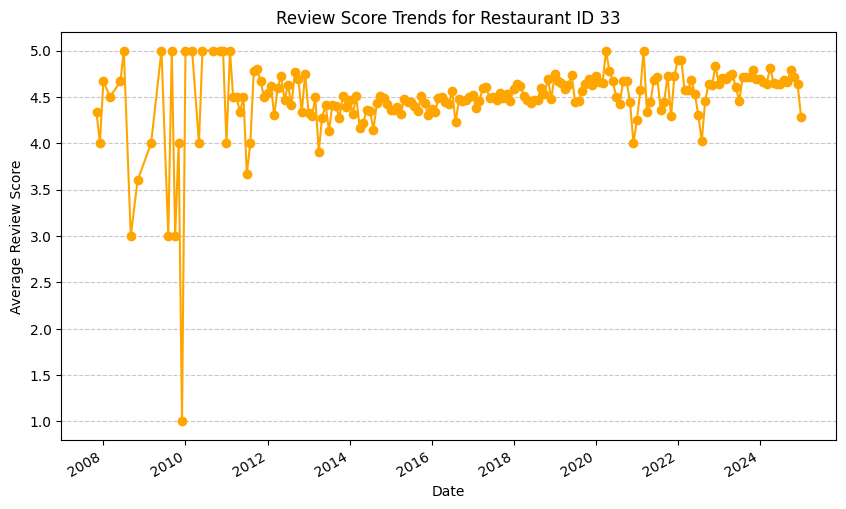

In [44]:
plt.figure(figsize=(10, 6))
review_trends.plot(marker='o', color='orange')
plt.title(f'Review Score Trends for Restaurant ID {id_restaurant}')
plt.xlabel('Date')
plt.ylabel('Average Review Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [47]:
def load_reviews_data():
    # Connexion à la base de données SQLite
    conn = sqlite3.connect(DB_PATH)
    
    # Requête SQL pour récupérer les avis (ajustez en fonction de votre structure de base de données)
    query = """
    SELECT
        REVIEW_YEAR,
        REVIEW_MONTH,
        REVIEW_SCORE,
        ID_RESTAURANT
    FROM reviews  -- Remplacez "reviews" par le nom de votre table d'avis
    """
    
    # Charger les données dans un DataFrame
    data_reviews = pd.read_sql(query, conn)
    
    # Fermer la connexion à la base de données
    conn.close()

    return data_reviews

In [48]:
load_reviews_data()

,REVIEW_YEAR,REVIEW_MONTH,REVIEW_SCORE,ID_RESTAURANT
0,2024,décembre,5.0,1
1,2024,décembre,5.0,1
2,2024,décembre,4.0,1
3,2024,novembre,4.0,1
4,2024,novembre,5.0,1
...,...,...,...,...
20405,2016,février,5.0,33
20406,2016,janvier,5.0,33
20407,2015,octobre,2.0,33
20408,2015,octobre,5.0,33


In [ ]:
        # Ajouter un filtre avec des boutons radio pour sélectionner le sentiment
        sentiment_filter = st.radio(
            "Choisissez un sentiment :",
            options=['Positif', 'Neutre', 'Négatif'],
            index=0,  # Par défaut, "Positif" est sélectionné
            horizontal=True
        )

        # Récupérer les avis selon le sentiment sélectionné
        filtered_reviews = get_reviews_by_sentiment(selected_restaurant_name, sentiment_filter)

        # Afficher les avis filtrés
        if filtered_reviews:
            for review in filtered_reviews:
                st.markdown(f"""
                    <div class="comment">
                        <strong>🗨️ {review['title']}</strong><br>
                        {review['body']}<br>
                        <i>{generate_stars(review['score'])}</i>
                    </div>
                """, unsafe_allow_html=True)
        else:
            st.markdown("""
                <div class="comment">
                    Aucun avis trouvé pour ce sentiment.
                </div>
            """, unsafe_allow_html=True)